# Logistic Regression(Flower Dataset)

How do you create a logistic regression model using Scikit-Learn? The first thing you need to know is that despite the name logistic regression containing the word regression, logistic regression is a model used for classification. Classification models can be used for tasks like classifying flower species or image recognition. All of this of course depends on the availability and quality of your data. Logistic Regression has some advantages including

Model training and predictions are relatively fast
No tuning is usually needed for logistic regression unless you want to regularize your model.
Finally, it can perform well with a small number of observations.
In this video, I'll share with you how you can create a logistic regession model for binary classification.

# Import Libraries

In [101]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

# Load the Dataset
The code below loads a modified version of the iris dataset which has two classes. A 1 is a virginica flower and a 0 is versicolor flower.

In [13]:
df=pd.read_csv("modifiedIris2Classes.csv")

In [14]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,7.0,3.2,4.7,1.4,0
1,6.4,3.2,4.5,1.5,0
2,6.9,3.1,4.9,1.5,0
3,5.5,2.3,4.0,1.3,0
4,6.5,2.8,4.6,1.5,0


In [15]:
df.shape

(100, 5)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  100 non-null    float64
 1   sepal width (cm)   100 non-null    float64
 2   petal length (cm)  100 non-null    float64
 3   petal width (cm)   100 non-null    float64
 4   target             100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.0 KB


# Splitting Data into Training and Test Sets

In [25]:
x_train, x_test, y_train, y_test = train_test_split(df[['petal length (cm)']], df['target'], random_state=0)#if we not mention test_size,it will take defaultly 0.25

# Standardize the Data
Logistic Regression is effected by scale so you need to scale the features in the data before using Logistic Regresison. You can transform the data onto unit scale (mean = 0 and variance = 1) for better performance. Scikit-Learn's StandardScaler helps standardize the dataset’s features. Note you fit on the training set and transform on the training and test set.

In [26]:
scaler=StandardScaler()
# Fit on training set only.
scaler.fit(x_train)
# Apply transform to both the training set and the test set.
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [27]:
x_train

array([[-2.29778941],
       [-0.24187257],
       [ 0.24187257],
       [ 0.84655399],
       [-0.12093628],
       [ 0.24187257],
       [ 1.45123542],
       [ 0.84655399],
       [ 2.4187257 ],
       [ 0.24187257],
       [ 0.12093628],
       [-0.48374514],
       [-0.48374514],
       [ 0.12093628],
       [ 0.96749028],
       [-0.48374514],
       [ 0.48374514],
       [-1.08842656],
       [-0.36280885],
       [-0.36280885],
       [-0.60468142],
       [-0.96749028],
       [-0.60468142],
       [-0.96749028],
       [-0.48374514],
       [ 0.24187257],
       [ 1.45123542],
       [-0.24187257],
       [-0.48374514],
       [-0.48374514],
       [ 1.33029913],
       [-0.84655399],
       [-0.48374514],
       [-0.24187257],
       [ 1.20936285],
       [-1.69310799],
       [-1.45123542],
       [ 0.72561771],
       [ 1.69310799],
       [ 1.08842656],
       [ 1.45123542],
       [-1.20936285],
       [ 0.84655399],
       [-1.5721717 ],
       [ 0.60468142],
       [-1

In [28]:
x_test

array([[-0.12093628],
       [ 0.84655399],
       [ 0.        ],
       [ 2.05591684],
       [ 1.33029913],
       [ 1.20936285],
       [-0.48374514],
       [ 0.        ],
       [ 1.08842656],
       [ 0.36280885],
       [ 0.84655399],
       [ 0.24187257],
       [ 0.84655399],
       [-0.24187257],
       [-1.93498056],
       [-1.33029913],
       [ 0.        ],
       [-0.72561771],
       [ 0.24187257],
       [-0.36280885],
       [-1.93498056],
       [ 0.72561771],
       [-1.08842656],
       [ 0.        ],
       [-0.84655399]])

# Logistic Regression
Step 1: Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [29]:
# This was already imported earlier in the notebook so commenting out
from sklearn.linear_model import LogisticRegression

Step 2: Make an instance of the Model

This is a place where we can tune the hyperparameters of a model. Typically this is where you tune C is related to regularization

In [30]:
model=LogisticRegression()

Step 3: Training the model on the data, storing the information learned from the data

Model is learning the relationship between x ( sepal length) and y (labels-which species of iris)

model.fit(X_train, y_train) # training

In [31]:
model.fit(x_train,y_train)

LogisticRegression()

Step 4: Predict the labels of new data (new flowers)

Logistic regression also allows you to see prediction probabilities as well as a prediction. This is not like other algorithms like decision trees for classification which only give you a prediction not a probability.

In [33]:
# One observation's petal length after standardization
x_test[0].reshape(1,-1)

array([[-0.12093628]])

In [34]:
#check predict and probability 
print('Predict:',model.predict(x_test[0].reshape(1,-1)))
print('Probability:',model.predict_proba(x_test[0].reshape(1,-1)))#it will give 2 probability value

Predict: [0]
Probability: [[0.52720087 0.47279913]]


In [40]:
#changing 2dimention array to single dimention array
x_test.reshape(-1)#-1 means all x_test values

array([-0.12093628,  0.84655399,  0.        ,  2.05591684,  1.33029913,
        1.20936285, -0.48374514,  0.        ,  1.08842656,  0.36280885,
        0.84655399,  0.24187257,  0.84655399, -0.24187257, -1.93498056,
       -1.33029913,  0.        , -0.72561771,  0.24187257, -0.36280885,
       -1.93498056,  0.72561771, -1.08842656,  0.        , -0.84655399])

In [42]:
#displaying predicted data to 2 dimentional array
y_prd=np.array(model.predict(x_test)).reshape(1,-1)
y_prd

array([[0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
        0, 1, 0]], dtype=int64)

# If this is unclear, let's visualize how logistic regression makes predictions by looking at our test data!

In [50]:
example_df=pd.DataFrame()
example_df['petal length (cm)']=x_test.reshape(-1)
example_df['target']=y_test.values
example_df['logistic_preds']=pd.DataFrame(model.predict_proba(x_test))[1]#here we storing probability of first value

In [51]:
example_df

,petal length (cm),target,logistic_preds
0,-0.120936,0,0.472799
1,0.846554,1,0.950658
2,0.000000,0,0.568197
3,2.055917,1,0.998879
4,1.330299,1,0.988926
5,1.209363,1,0.983835
6,-0.483745,0,0.221122
7,0.000000,1,0.568197
8,1.088427,1,0.976459
9,0.362809,1,0.806079


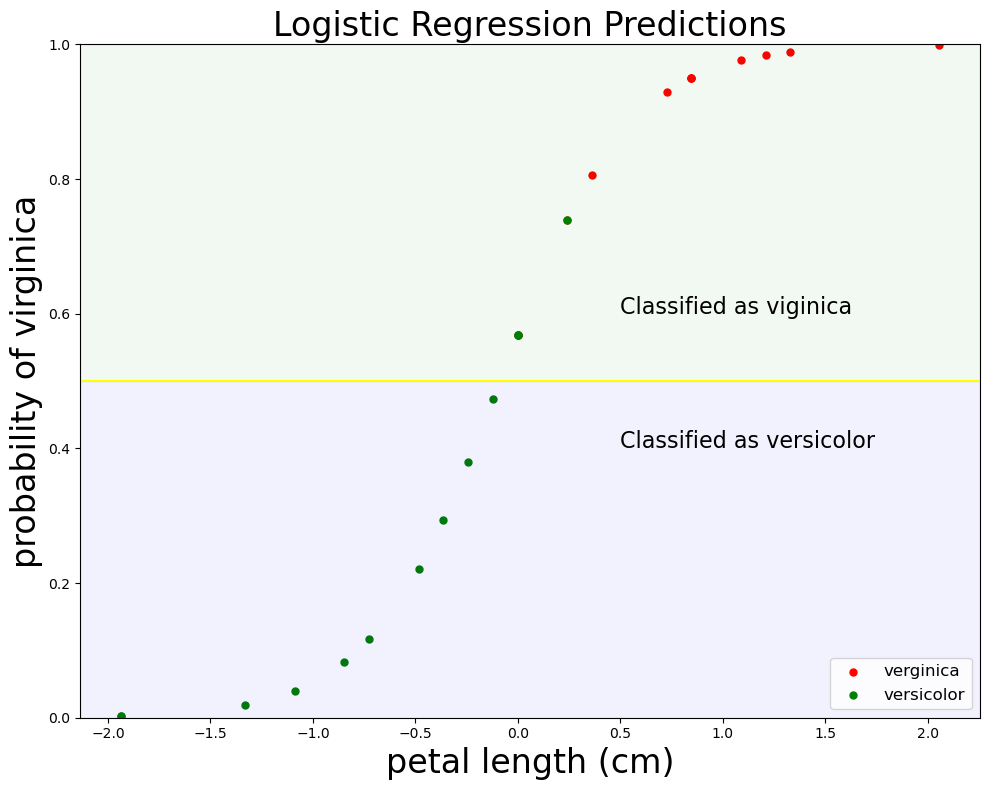

In [81]:
#draw the sigmod() function graph using above example_df dataset
#here we above 0.5 is verginica and below 0.5 versicolor
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,8))
#filtering the target 0 and 1
verginica_filter=example_df['target']==1
versicolor_filter=example_df['target']==0
#draw the scatter plot for logistic predict columns by target filter
ax.scatter(example_df.loc[verginica_filter,'petal length (cm)'].values,example_df.loc[verginica_filter,'logistic_preds'].values,s=25,color='r',label='verginica')
#draw the scatter plot for logistic predict columns by target filter
ax.scatter(example_df.loc[versicolor_filter,'petal length (cm)'].values,example_df.loc[versicolor_filter,'logistic_preds'].values,s=25,color='green',label='versicolor')
#draw the horizontal line in 0.5
ax.axhline(y=.5,color='yellow')

#set different colors for each parts
ax.axhspan(.5,1,alpha=0.05,color='green')
ax.axhspan(0,0.4999,alpha=0.05,color='blue')
#
ax.set_ylim(0,1)#used to fit the diagram up to bottom
#set the Labels for each parts
ax.text(0.5, .6, 'Classified as viginica', fontsize = 16)
ax.text(0.5, .4, 'Classified as versicolor', fontsize = 16)
ax.legend(loc = 'lower right', markerscale = 1.0, fontsize = 12)
ax.set_xlabel('petal length (cm)', fontsize = 24)
ax.set_ylabel('probability of virginica', fontsize = 24)
ax.set_title('Logistic Regression Predictions', fontsize = 24)
fig.tight_layout()
'''
fig.tight_layout() is a function in Matplotlib that adjusts the layout of subplots or axes within a figure to prevent overlapping. It is useful when you have multiple subplots in a figure
'''

Measuring Model Performance

While there are other ways of measuring model performance (precision, recall, F1 Score, ROC Curve, etc), let's keep this simple and use accuracy as our metric.  To do this are going to see how the model performs on new data (test set)

Accuracy is defined as: (fraction of correct predictions): correct predictions / total number of data points

In [95]:
score=model.score(x_test,y_test)
score

0.88

In [96]:
y_test

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0], dtype=int64)

In [97]:
model.predict(x_test)

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0], dtype=int64)

Accuracy is one metric, but it doesn't say give much insight into what was wrong. Let's look at a confusion matrix

In [99]:
from sklearn import metrics

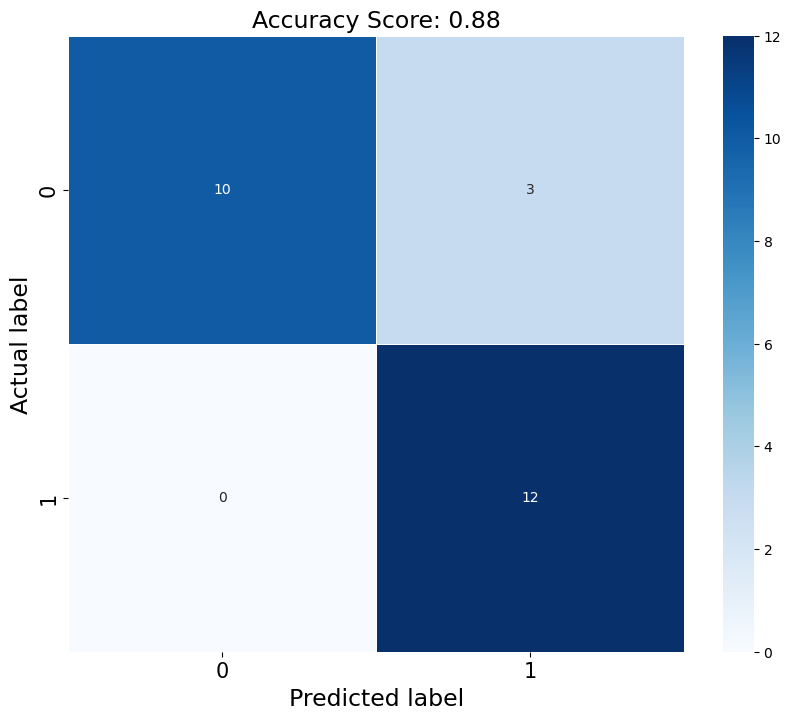

In [115]:
cm=metrics.confusion_matrix(y_test,model.predict(x_test))
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt=".0f",square=True,linewidth=.5,cmap='Blues')
'''
annot=True: It adds annotations (numbers) to each cell of the heatmap, displaying the actual values of the confusion matrix.
fmt=".0f": It specifies the format of the annotations. In this case, it's set to display floating-point numbers with zero decimal places.

linewidths=.5: It sets the width of the lines between cells in the heatmap to 0.5.

square=True: It ensures that each cell in the heatmap is square.

cmap='Blues': It specifies the color map to be used for the heatmap. In this case, the 'Blues' color map is chosen, where darker shades represent higher values.
'''
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(score), size = 17)
plt.tick_params(labelsize= 15)#x and y labels(0,1,0,1)

In [116]:
cm

array([[10,  3],
       [ 0, 12]], dtype=int64)

In [121]:
modify_cm=[]
for index,value in enumerate(cm):
    if index==0:
        modify_cm.append(["TN="+str(value[0]),'FP = ' + str(value[1])])
    if index==1:
        modify_cm.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])

In [122]:
modify_cm

[['TN=10', 'FP = 3'], ['FN = 0', 'TP = 12']]

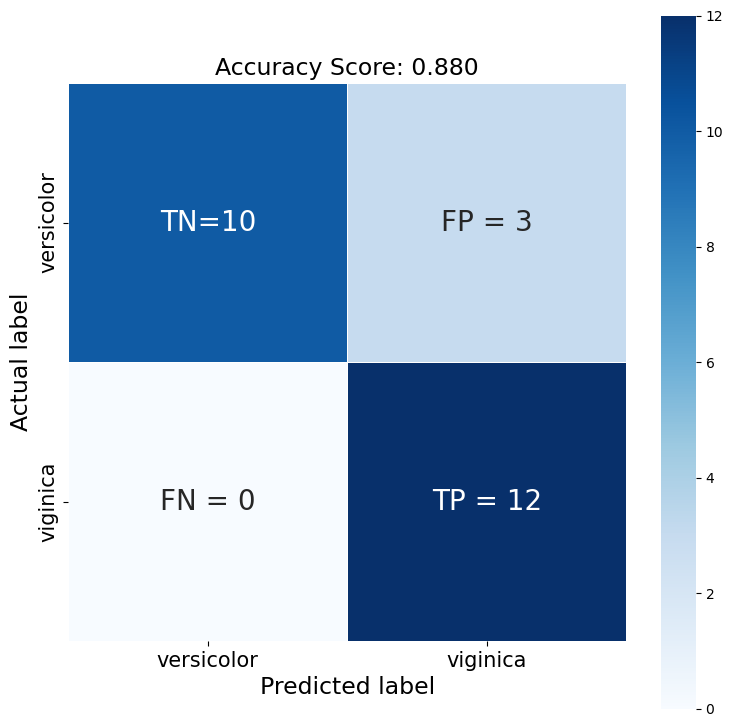

In [124]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=np.array(modify_cm),
            fmt="",
            annot_kws={"size": 20},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = ['versicolor', 'viginica'],
            yticklabels = ['versicolor', 'viginica'],
            );

plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {:.3f}'.format(score), size = 17);
plt.tick_params(labelsize= 15)